<a href="https://colab.research.google.com/github/UttaraKet1607/Hindi-Character-Recognition/blob/main/CNN_Split_Training_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! unzip "training.zip"

In [2]:
import os
import shutil
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Creating a Validation Set

In [3]:
os.mkdir('validation')
os.mkdir('./validation/background')
os.mkdir('./validation/hi')

In [4]:
#finding total number of files in each class
bg_imgs = os.listdir('./training/background') 
hi_imgs = os.listdir('./training/hi')
print(len(bg_imgs))
print(len(hi_imgs))
# ? class imbalance 

4450
1425


In [5]:
validation_imgs = bg_imgs[3115:] #30% of 4450
len(validation_imgs)
for f in validation_imgs:
  shutil.move(os.path.join('./training/background',f),'./validation/background')

In [6]:
validation_imgs = hi_imgs[997:] #30% of 1425
len(validation_imgs)
for f in validation_imgs:
  shutil.move(os.path.join('./training/hi',f),'./validation/hi')

## Data Preparation

In [7]:
generator = image.ImageDataGenerator(rescale=1./255, rotation_range=40,       
      width_shift_range=0.2,   
      height_shift_range=0.2,  
      shear_range=0.2,         
      zoom_range=0.2,           
      horizontal_flip=True,    
      fill_mode="nearest")
train_datagen = generator.flow_from_directory('./training',target_size=(150,150),classes=['background','hi'],class_mode='binary',batch_size=20)
test_datagen = generator.flow_from_directory('./validation',target_size=(150,150),classes=['background','hi'],class_mode='binary',batch_size=20)


Found 4112 images belonging to 2 classes.
Found 1763 images belonging to 2 classes.


## Model Building

In [27]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = "relu", input_shape=(150,150,3)))
model.add(MaxPool2D((2,2), padding = "same"))
model.add(Conv2D(32, (3,3), activation = "relu", input_shape=(150,150,3)))
model.add(MaxPool2D((2,2), padding = "same"))
model.add(Conv2D(32, (3,3), activation = "relu", input_shape=(150,150,3)))
model.add(MaxPool2D((2,2), padding = "same"))
model.add(Flatten())
model.add(Dense(128, activation= "relu"))
model.add(Dense(128, activation= "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [28]:
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")

In [29]:
history = model.fit(train_datagen,epochs=10,validation_data=test_datagen)

Epoch 1/10
206/206 [==============================] - 37s 176ms/step - loss: 0.4412 - accuracy: 0.8140 - val_loss: 0.3343 - val_accuracy: 0.8599
Epoch 2/10
206/206 [==============================] - 36s 175ms/step - loss: 0.3145 - accuracy: 0.8745 - val_loss: 0.2748 - val_accuracy: 0.8939
Epoch 3/10
206/206 [==============================] - 36s 175ms/step - loss: 0.2613 - accuracy: 0.8952 - val_loss: 0.2458 - val_accuracy: 0.8985
Epoch 4/10
206/206 [==============================] - 36s 176ms/step - loss: 0.2271 - accuracy: 0.9088 - val_loss: 0.1941 - val_accuracy: 0.9223
Epoch 5/10
206/206 [==============================] - 36s 175ms/step - loss: 0.2061 - accuracy: 0.9239 - val_loss: 0.2057 - val_accuracy: 0.9155
Epoch 6/10
206/206 [==============================] - 36s 176ms/step - loss: 0.2031 - accuracy: 0.9268 - val_loss: 0.1702 - val_accuracy: 0.9376
Epoch 7/10
206/206 [==============================] - 36s 174ms/step - loss: 0.1708 - accuracy: 0.9319 - val_loss: 0.1630 - val_ac

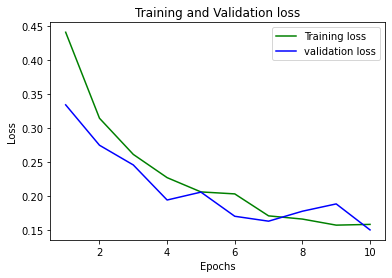

In [30]:
import matplotlib.pyplot as plt

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

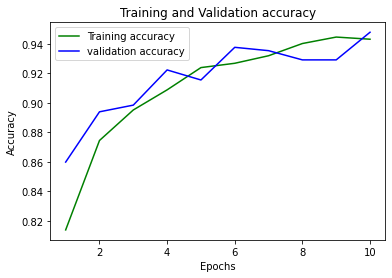

In [31]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model Testing

In [ ]:
! unzip "test.zip"

In [17]:
#test_datagen = generator.flow_from_directory('./test',target_size=(150,150),class_mode='binary',batch_size=20)

Found 0 images belonging to 2 classes.


In [ ]:
model.predict(test_datagen)